#### Code to generate TMB plots 

- The script takes an input file that has sample name, disease type and TMB score in each line
- We use seaborn module from python and implement `stripplot` to generate TMB plots per disease type
- There are about 40 disease types in the input file some of them with very few samples. 
    Only disease types with at least 20 samples are used in the plots
- x-axis shows each disease type and y-axis show the TMB scores in log scale. Median lines for each
    disease type are also plotted

Populating the interactive namespace from numpy and matplotlib


/Users/kogantit/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


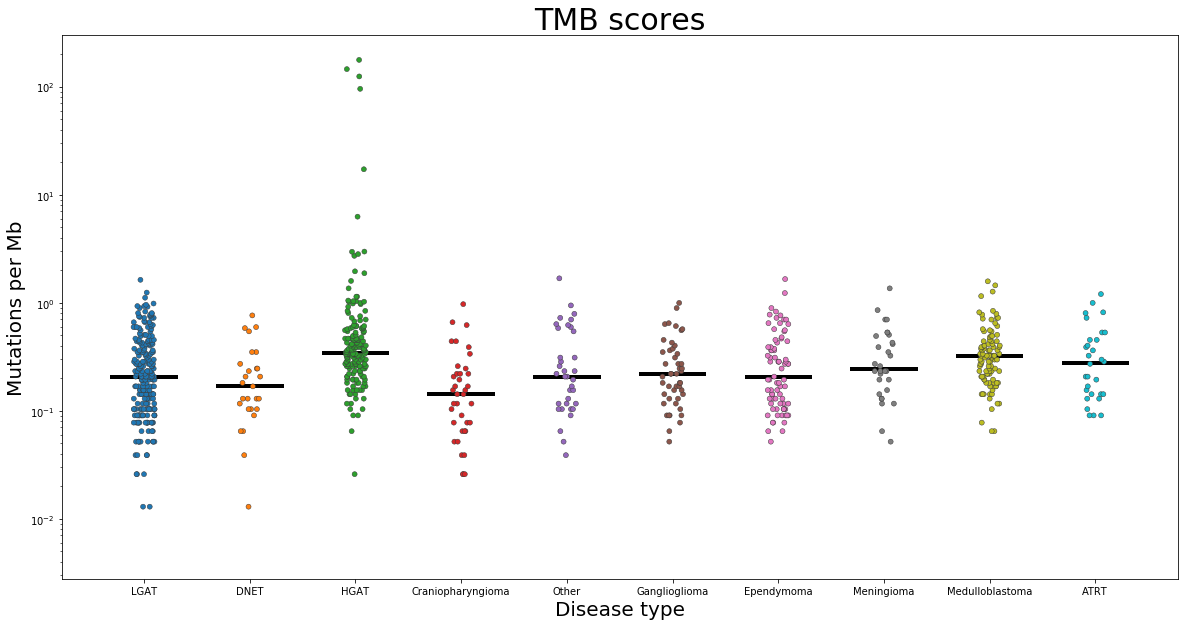

In [96]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
%pylab inline

# Reading input file into pandas 
tmb_scores_df = pd.read_csv("results/pbta-snv-mutect2-tmbscores.txt", sep=",")


# Only diseas types with more than 20 samples 
count_gt_20 = tmb_scores_df.groupby("short_histology").count().iloc[:,0]>20
                                #Counting samples per disease type
count_gt_20.name = 'count'      # This will rename the header because the header
                                #is same as original input file. 

# Joining the count DF and input tmb DF
new_tmb_df = tmb_scores_df.join(count_gt_20, on='short_histology')
# Choosing only the lines that show a true under count column
tmb_scores_df = new_tmb_df[new_tmb_df['count']].iloc[:,:3]
#tmb_scores_df["TMB"] = np.log(tmb_scores_df["TMB"])

# Getting the disease names to plot 
diseasenames = tmb_scores_df['short_histology'].unique()
# This is the length of the median line plotted 
    #under each disease plot
median_width = 0.6
# Defining figure size
plt.figure(figsize = (20,10))
#This plots all the disease types
ax = sns.stripplot(x="short_histology", y="TMB", data=tmb_scores_df.sort_values("TMB"), jitter=1, linewidth=0.5)
#This loops over every xtick along with the name and plots the median value
for tick, text in zip(ax.get_xticks(), ax.get_xticklabels()):
        sample_name = text.get_text()  # "X" or "Y"
        # calculate the median value for all replicates of either X or Y
        median_val = np.median(tmb_scores_df['TMB'][tmb_scores_df['short_histology']==sample_name])
        # plot horizontal lines across the column, centered on the tick
        ax.plot([tick-median_width/2, tick+median_width/2], [median_val, median_val],
                lw=4, color='k')
        
#Taking log scale of y-axis         
plt.yscale('log')
#ax.set_yticklabels(['','','.01','.1','1','10','100'])
ax.set_title('TMB scores',fontsize= 30) # title of plot
ax.set_xlabel('Disease type',fontsize = 20) #xlabel
ax.set_ylabel('Mutations per Mb', fontsize = 20)#ylabelplt.savefig('results/pbta-snv-mutect2.TMB.png')
plt.savefig('results/pbta-snv-mutect2.TMB.png')